# 3-7. 지도투영법

## 3-7-1. 정거원통도법 (Cylindrical equidistant)

In [10]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [11]:
maptype = "cartopy"

In [12]:
f = Dataset("wspd.mon.ltm.1981-2010.nc", "r")
lat = np.squeeze(f.variables["lat"][:])
lon = np.squeeze(f.variables["lon"][:])
level = np.squeeze(f.variables['level'][:])
ind_level = np.where(level == 300)[0]

In [13]:
print(lon)

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]


In [14]:
ind_winter = [0,1,11] #Jan, Feb, Dec
ind_summer = [5,6,7] #Jun, Jul, Aug

In [15]:
wspd_winter = np.mean(np.squeeze( f.variables["wspd"][ind_winter,ind_level,:,:]), axis = 0)
#time 에 대해 mean
print(wspd_winter.shape) #(73, 144)

wspd_summer = np.mean(np.squeeze( f.variables["wspd"][ind_summer,ind_level,:,:]), axis = 0)
wspd = np.stack((wspd_winter, wspd_summer))
wspd.shape
#wspd.shape (2, 73, 144)
#wspd[0] | wspd_winter, wspd[1] | wspd_summer

(73, 144)


(2, 73, 144)

In [16]:
lon2d, lat2d = np.meshgrid(lon,lat)
contour_levels = np.arange(0,80+10, 10)
titles = ["DJF", "JJA"]
print(lon2d)

[[  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 ...
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]]


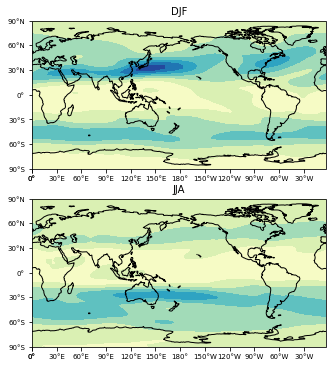

In [17]:
    fig, ax = plt.subplots(2,1,figsize=(7,6), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}) #그림 객체 생성(정거원통도법)
    for i in range(2):
        ax[i].set_xticks(np.arange(0,360+30,30), crs=ccrs.PlateCarree()) #경도선
        ax[i].set_yticks(np.arange(-90,90+30,30), crs=ccrs.PlateCarree()) #위도선
        ax[i].xaxis.set_major_formatter(LongitudeFormatter()) #경도눈금값 서식
        ax[i].yaxis.set_major_formatter(LatitudeFormatter()) #위도눈금값 서식
        ax[i].tick_params(axis='both',labelsize=7)
        ax[i].coastlines() #해안선

        image = ax[i].contourf(lon2d,lat2d, wspd[i,:,:], contour_levels, cmap='YlGnBu', extend='both', latlon=True, transform=ccrs.PlateCarree()) #풍속등고선 shading그림
        ax[i].set_title(titles[i],fontsize=10)

In [ ]:
if==2:
    dddd
elif 

(73, 144)
[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5]
[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45

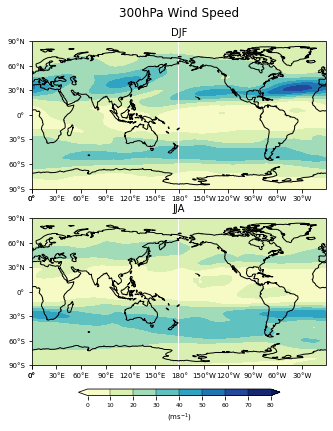

In [18]:
f = Dataset("wspd.mon.ltm.1981-2010.nc", "r")
lat = np.squeeze(f.variables["lat"][:])
lon = np.squeeze(f.variables["lon"][:])
level = np.squeeze(f.variables['level'][:])
ind_level = np.where(level == 300)[0]
#300hp index 찾기

ind_winter = [0,1,11] #Jan, Feb, Dec
ind_summer = [5,6,7] #Jun, Jul, Aug

#wspd = f.variables["wspd"]
#wspd.shape #(12, 17, 73, 144) #(time, elvel, lat, lon)

#testing
#wspd_winter = np.squeeze(wspd[ind_winter,:,:,:]) 
#wspd_winter.shape = (3,17,73,144) DJF 에 대해서만 squeeze됨.

wspd_winter = np.mean(np.squeeze( f.variables["wspd"][ind_winter,ind_level,:,:]), axis = 0)
#time 에 대해 mean
print(wspd_winter.shape) #(73, 144)

wspd_summer = np.mean(np.squeeze( f.variables["wspd"][ind_summer,ind_level,:,:]), axis = 0)
wspd = np.stack((wspd_winter, wspd_summer))
wspd.shape
#wspd.shape (2, 73, 144)
#wspd[0] | wspd_winter, wspd[1] | wspd_summer

print(lon)
print (lat)

lon2d, lat2d = np.meshgrid(lon,lat)
contour_levels = np.arange(0,80+10, 10)
titles = ["DJF", "JJA"]
print(lon2d)

#1) BASEMAP 으로 그림그리기
if maptype =="Basemap":
    fig, ax = plt.subplots(2,1,figsize=(7,6))
    for i in range(2):
        m = Basemap(projection="cyl", resolution="h", ax=ax[i],
                   lon_0=0, lat_0=0, #center of map domain 
                llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90)
        m.drawparallels(np.arange(-90,90+30,30), labels = [1,0,0,0], fontsize=7, linewidth=0)
        m.drawmeridians(np.arange(0,360+30,30), labels = [0,0,0,1], fontsize=7, linewidth=0)
        m.drawcoastlines()
        
        image = m.contourf(lon2d, lat2d, wspd[i,:,:], contour_levels, cmap = 'YlGnBu', extend = 'both', latlon=True)
        ax[i].set_title(titles[i], fontsize=10)
        
elif maptype =="cartopy":
    #fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,6))
    #ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude=180))
    fig, ax = plt.subplots(2,1, figsize=(7,6), subplot_kw=
                           {"projection" : ccrs.PlateCarree(central_longitude=180)})
    for i in range(2):
        ax[i].set_xticks(np.arange(0,360+30,30), crs = ccrs.PlateCarree())
        ax[i].set_yticks(np.arange(-90,90+30,30), crs = ccrs.PlateCarree())
        ax[i].xaxis.set_major_formatter(LongitudeFormatter())
        ax[i].yaxis.set_major_formatter(LatitudeFormatter())
        ax[i].tick_params(axis='both', labelsize=7)
        ax[i].coastlines()
        
        image = ax[i].contourf(lon2d, lat2d, wspd[i,:,:], contour_levels, cmap='YlGnBu',
                              extend = 'both', tranform=ccrs.PlateCarree())
        ax[i].set_title(titles[i], fontsize=10)

        
caxes = fig.add_axes([0.3,0.08, 0.4, 0.015])
cbar = plt.colorbar(image, cax=caxes, orientation='horizontal', ticks = contour_levels, format = '%d', drawedges=True)
cbar.set_label(label="(ms$^{-1}$)", size=7)
cbar.ax.tick_params(labelsize=6)

plt.suptitle("300hPa Wind Speed", fontsize=12)
plt.subplots_adjust(top=0.9, bottom=0.15, left = 0.1, right=0.9, wspace =0, hspace =0.2)
plt.show()


#filename_figure ="300hpa Wind Speed.jpg"
#plt.savefig(filename_figure)

